In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
DATAPATH = 'data/fetal_ECG.mat'
CSVPATH = 'data/ECGs.csv'

In [8]:
data = loadmat(r"I:\Work\ECG\fetal_ECG\data\fetal_ECG.mat")
mother = data['Mother_ECG_chest']
abdomen = data['abdomen_recorded_signal']
unknow = data['Fetal_ECG_unknow']

data = np.column_stack((mother, abdomen, unknow))
np.savetxt('data/ECGs.csv', data, delimiter=',')

In [12]:
df = pd.read_csv(CSVPATH)

mother = df.iloc[:, 0]
abdomen = df.iloc[:, 1]
unknow = df.iloc[:, 2]
time = np.linspace(0, 2000, 1999)

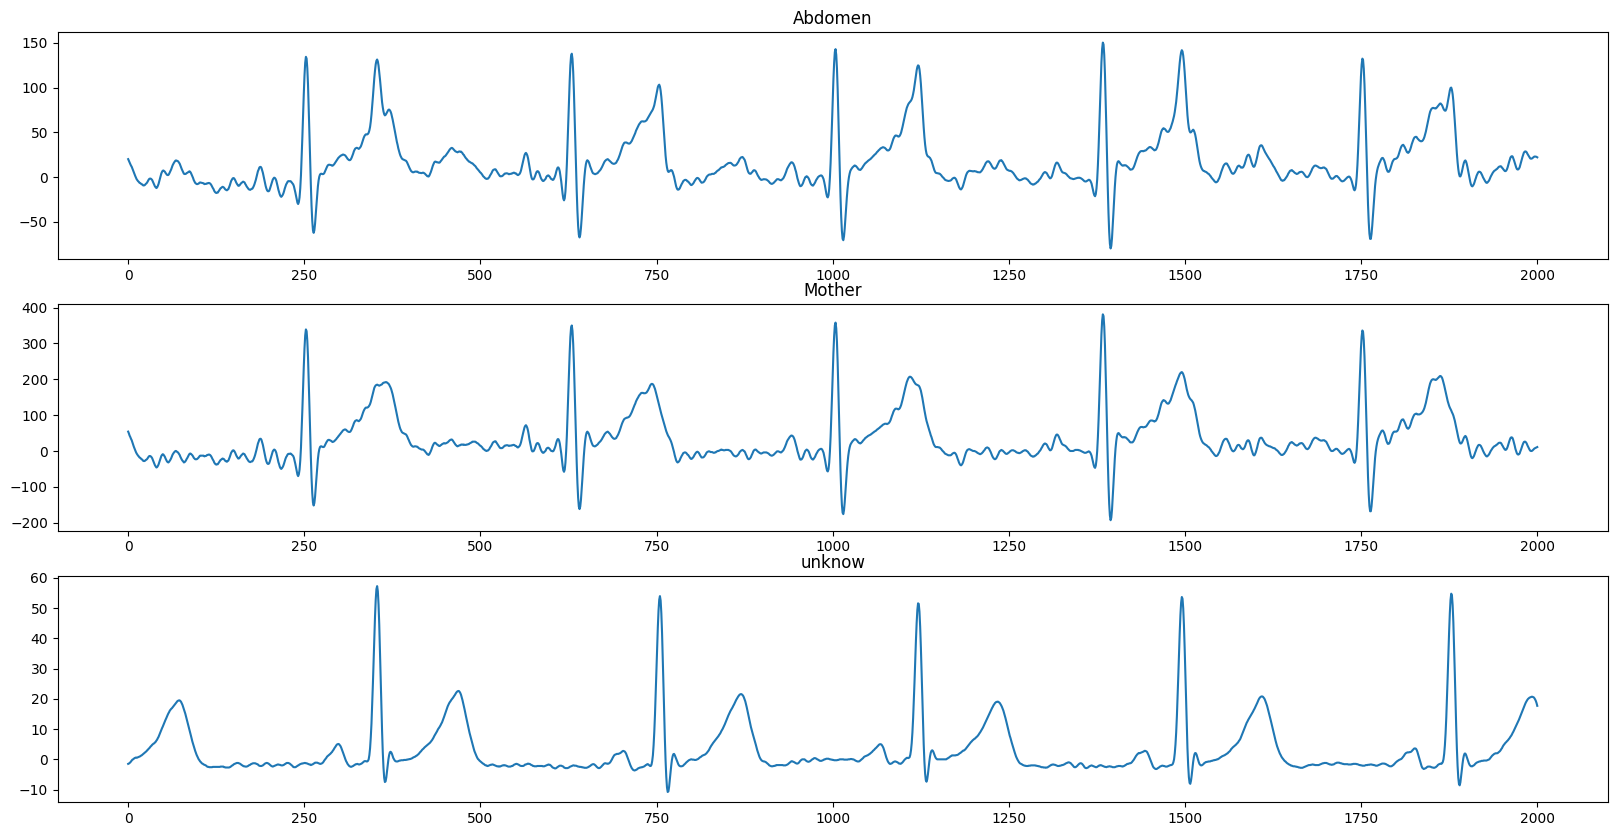

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(time, abdomen)
plt.title('Abdomen')

plt.subplot(3, 1, 2)
plt.plot(time, mother)
plt.title('Mother')

plt.subplot(3, 1, 3)
plt.plot(time, unknow)
plt.title('unknow')

plt.show()

In [14]:
mother = np.asarray([[int(i)] for i in mother])
abdomen = np.asarray([[int(j)] for j in abdomen])

[[ 0.50657399]
 [ 0.4184155 ]
 [ 0.3126253 ]
 ...
 [-0.0576404 ]
 [-0.0576404 ]
 [-0.0576404 ]]


I:\Work\ECG\fetal_ECG\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:582: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


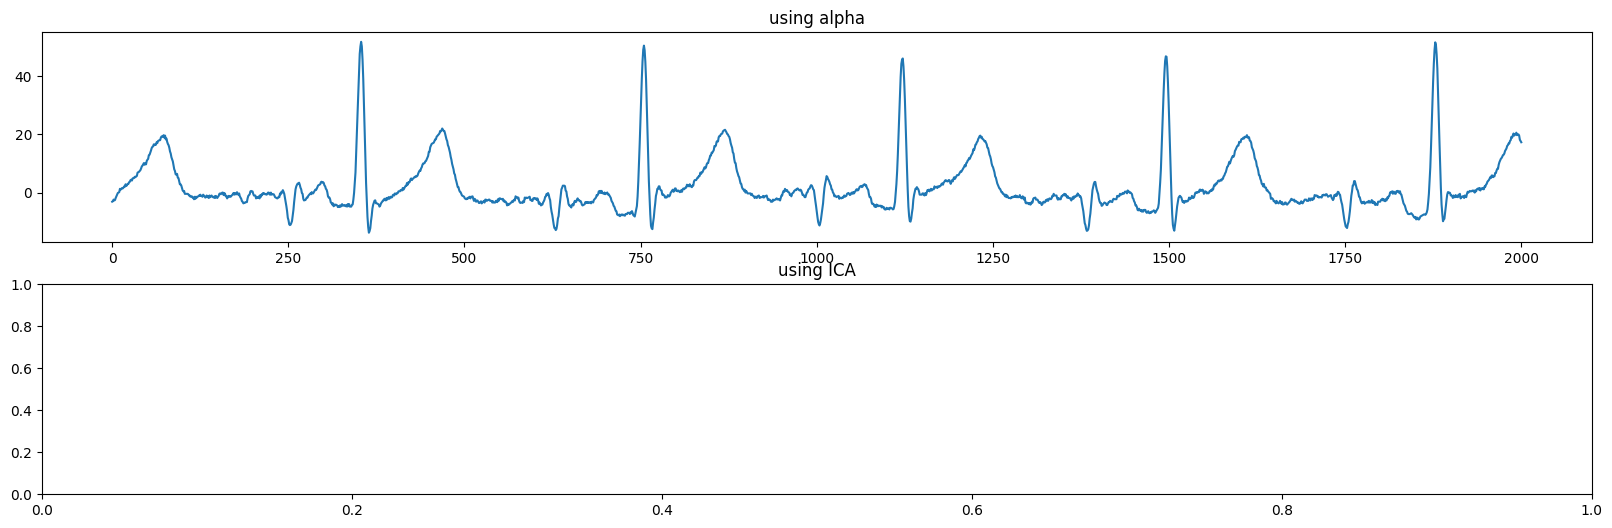

In [17]:
plt.figure(figsize=(20, 6))

plt.subplot(2, 1, 1)
plt.title('using alpha')
alpha = np.divide(np.dot(mother.T, abdomen), (np.dot(mother.T, mother)))
fetal_1 = abdomen - (alpha * mother)
plt.plot(time, fetal_1)

plt.subplot(2, 1, 2)
plt.title('using ICA')
maternal_ecg = np.vstack((mother, abdomen))
ica = FastICA(n_components=2)
sources = ica.fit_transform(maternal_ecg)
print(sources)

plt.show()